<a href="https://colab.research.google.com/github/reireu/for-copy/blob/main/dnm2_06st_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データと数理II 第06回 「フーリエ変換、テイラー展開、オイラーの公式」


In [ ]:
%matplotlib inline
#%matplotlib nbagg # JupyterLabでは上手く動かないので今回は使わない。
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML, Audio
import random

import sympy as sym
# Jupyter Notebook上で、レンダリングされた結果を表示する
sym.init_printing()

## フーリエ級数展開の式の確認
----
- フーリエ級数展開の公式と意味 | 高校数学の美しい物語
    - https://mathtrain.jp/fourierseries


$f(x)$ が周期 $T$ の「まともな」関数なら

 $f(x)=\dfrac{a_0}{2}+\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)$

ただし，

$a_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\cos\dfrac{2\pi nx}{T}dx$

$b_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\sin\dfrac{2\pi nx}{T}dx$

----

なお、$a_0$は

$a_0=\dfrac{2}{T}\displaystyle\int_0^Tf(x)dx$

となる。つまり元の式の第一項の$\frac{a_0}{2}$は、

$\frac{a_0}{2}=\dfrac{1}{T}\displaystyle\int_0^Tf(x)dx$

これは、関数$f(x)$を0からTの区間で積分してTで割ることなので、要は関数$f(x)$の平均成分のことである。
(面積を求めて底辺で割ってる)



----
### フーリエ級数展開の中身を再度確認



$f(x)=\dfrac{a_0}{2}+\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)$

の

$\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)$

部分は、展開するとこうである。

$(a_1\cos \dfrac{2\pi \cdot 1 x}{T}+b_1\sin \dfrac{2\pi \cdot 1 x}{T})
+(a_2\cos \dfrac{2\pi \cdot 2 x}{T}+b_2\sin \dfrac{2\pi \cdot 2 x}{T})
+(a_3\cos \dfrac{2\pi \cdot 3 x}{T}+b_3\sin \dfrac{2\pi \cdot 3 x}{T}) + \cdots$


----

ここで、

$\dfrac{2\pi n x}{T}$

の部分は、Tさえ決めれば同じ形なので、情報量があるのは

$\{a_n\}, \{b_n\}$

の部分だけである。これは、対応する周波数の波の振幅の増幅具合がどれぐらいか、ということを表した係数に当たる。

言い換えると、Tと、係数部分の

$\{a_n\}, \{b_n\}$

だけを保持しておけば、元の波が再現できる。


----
これは一種の「座標変換」であると考えることができる。

- (例)直交座標系で表しても、極座標系で表しても、表記が変わるだけで中身は同じ

同じ波を表すのに、データ列(プロットすると波に見える)でそのまま表してもいいし、周波数ごとの増幅具合で表しても良い。


----
## フーリエ変換
### フーリエ変換(フーリエ級数展開からフーリエ変換へ)

- フーリエ級数展開は、周期を持つ関数(同じ形を繰り返す関数)しか表現できない
- また、基本周波数(周期の逆数)の整数倍の周波数の波の重ね合わせでしか表現できない
- とはいえ、周期Tをいくらでも大きく取れるので、実質何でも表現できると言えばできる

- では、Tを無限大にしちゃったらどうなるか？
    - 周期を持たない関数も表現できる
    - Tを無限大にすると、nxの変化が微小とみなせるので、nx/Tが連続の変化と見なせるので、連続の積分であると見なせるようになる。


- ある波にどんな周波数が含まれているのかを調べるには、普通はこちらのフーリエ変換を使う
    - フーリエ展開と言わなくもない。が、フーリエ変換と呼ぶことのほうが多い。
    - なぜか？これは「座標変換」であることをみんなが重要だと思ってるからだと思う。

----
覚えること

- フーリエ級数展開の周期を無限大にした場合がフーリエ変換
- フーリエ級数展開は周期関数のためのもの。フーリエ変換は周期関数じゃなくても大丈夫。

----

### フーリエ変換の式

今日一日で説明するのは無理なので、とりあえず結果を見よう。



- フーリエ変換(波の関数f(x)を周波数の関数F(k)に変換する)
$$
F(k) = \int^{\infty}_{-\infty} f(x) \ e^{-ikx} dx
$$

- フーリエ逆変換(周波数の関数F(k)を波の関数f(x)に変換する)
$$
f(x) = \frac{1}{2\pi} \, \int^{\infty}_{-\infty} F(k) \ e^{ikx} dk
$$



----
確認すると、フーリエ級数展開は以下だった。

$f(x)=\dfrac{a_0}{2}+\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)$

これと見比べると、いろいろ疑問だらけ。

- eってどこから出てきたの？
- sin cosはどこ行ったの？
- iって虚数だよね？どこから出てきたの？

----

それを説明するには、「オイラーの公式」が必要…。

- オイラーの公式：この世で最も美しい式とか言われるやつ

$$
e^{i\theta} = \cos \theta + i \cdot \sin \theta
$$

これ。これの、$\theta$が$\pi$の時は。

$$
e^{i\pi} = -1
$$

となる。これを「オイラーの等式」と言う。(よく考えるとすごい式なのだ。「すごい式だ」と言って知ったかぶりしていこう)




フーリエ変換でなんでeやiが出てきたのかをすごいざっくりいうと、この式を使って、cos(x)とsin(x)をe^xに置き換えたということ。



----
## フーリエ変換をやってみる

### 1. 離散のフーリエ変換をやってみよう！

- どうせコンピュータでできるのは離散のフーリエ変換なので、とりあえずそれができればなんとかなる
    - ライブラリも充実してるので、とりあえず使ってみよう。
    - 一旦上の話は忘れて良い


- NumPy 高速フーリエ変換による周波数解析
    - https://helve-python.hatenablog.jp/entry/2018/06/17/000000
    
こちらを使わせてもらった！

#### フーリエ変換にかける波の作成と確認

In [ ]:
N = 1024            # サンプル数
dt = 0.001          # サンプリング周期 [s]
f1, f2 = 50, 120    # 波の生成に使う周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 信号

fig, ax = plt.subplots()
ax.plot(t, x)
#ax.set_xlim(0, 0.1)                  # ここのコメントアウトを外すと拡大表示
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.grid()
plt.show()

### 2.フーリエ変換の結果の表示1

In [ ]:
F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[0].grid()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[1].grid()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
ax[2].grid()
plt.show()

3つのグラフはそれぞれ、「実部」「虚部」「周波数」を表している。


- この3つのグラフの横軸は、サンプル数に対応している。
- frequencyのグラフは「横軸：サンプル数、縦軸：周波数」となっている
    - 前半の正が周波数の軸、後半が負の周波数の軸。
    - Frequencyは、軸の情報と思えば良い。
    - この500という数字<font color="Red">（縦軸の）</font>は、サンプリング周期dt = 0.001から来ている(標本化定理と言う。dtを細かくするとより高い周波数が取れる)
- 上2つのグラフは、frequencyのグラフで表現される周波数(縦軸の値)に対応するそれそぞれの値を表している





- 元の関数が実関数なら、フーリエ変換の結果は複素共役になる(real部は一緒、imaginary部は正負が逆)
- とりあえず必要なのは前半だけ(正の周波数のところだけ)なのでそこをプロットしてみる。

In [ ]:
F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real[1:int(N/2)], label="Real part")
ax[0].legend()
ax[0].grid()
ax[1].plot(F.imag[1:int(N/2)], label="Imaginary part")
ax[1].legend()
ax[1].grid()
ax[2].plot(freq[1:int(N/2)], label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
ax[2].grid()
plt.show()

### 3.フーリエ変換の結果の表示2

- プロットする値のnp.abs(F/(N/2))というのは、振幅を表している。
    - Fは複素数なので、大きさを得るには絶対値を取る必要がある


```x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 元の信号```


In [ ]:
Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # plot(X,Y)
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

ちなみに、frequencyの軸をそのまま使ってプロットするとこうなる。(x軸に相当するので、勝手に順番を入れ替えてくれる)

In [ ]:
Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq, Amp) # plot(X,Y)
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

- とはいえ、対称形なのだから、正の部分だけあればよい。
- 周波数ごとの大きさを知りたければ、1からN/2までのところをプロットすれば十分


### 4.フーリエ変換を関数にまとめておく

In [ ]:
# 与えられた信号列をフーリエ変換して表示する関数
def plot_fft(x,dt,N):
    F = np.fft.fft(x) # 変換結果
    freq = np.fft.fftfreq(N, d=dt) # 周波数
    Amp = np.abs(F/(N/2)) # 振幅

    fig, ax = plt.subplots()
    ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # plot(X,Y)
    #ax.plot(Amp[1:int(N/2)]) # 前から描くだけならこう書いても同じ
    ax.set_xlabel("Freqency [Hz]")
    ax.set_ylabel("Amplitude")
    ax.grid()
    plt.show()

In [ ]:
N = 1024            # サンプル数
dt = 0.001          # サンプリング周期 [s]
f1, f2 = 50, 120    # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 信号

plot_fft(x,dt,N)

### 5.周波数を変えて試してみる

----

### 問1.周波数を変えてみよう。また、合成する波を増やしてみよう。

----

In [ ]:
N = 1024            # サンプル数
dt = 0.001          # サンプリング周期 [s]
f1, f2 = 50, 120    # 波の生成に使う周波数 [Hz] # ここを変える

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 信号 # ここを変える

plot_fft(x,dt,N)

### 6.音の波をフーリエ展開してみる

試しに220Hz,440Hzとしてみる。


In [ ]:
N = 1024            # サンプル数
dt = 0.001          # サンプリング周期 [s]
f1, f2 = 220, 440    # 周波数 [Hz] # 中央から一オクターブ低いラ、中央ラ

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 信号

plot_fft(x,dt,N)

500Hzまでしか表せないので、このまま大きくすると雲行きが怪しい。

dtを10倍細かくしてみよう。



In [ ]:
N = 1024            # サンプル数
dt = 0.0001          # サンプリング周期 [s]
f1, f2 = 220, 440    # 周波数 [Hz] # 中央から一オクターブ低いラ、中央ラ

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 信号

plot_fft(x,dt,N)

周波数は大丈夫になったが、振幅が怪しい。(1.5,1.0になるはずなのに、1.0,1,0になっている)

こちらも10倍にしてみよう。

In [ ]:
N = 1024 * 10         # サンプル数
dt = 0.0001          # サンプリング周期 [s]
f1, f2 = 220, 440    # 周波数 [Hz] # 中央から一オクターブ低いラ、中央ラ

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # 信号

plot_fft(x,dt,N)

比率は良さげになったのでとりあえずよしとする。

----
- 覚えておこう！

標本化定理：波形の最大周波数の2倍を超えた周波数で標本化すれば完全に元の波形に再構成される。

----



### 7.実際の音のフーリエ変換
前回作った音の関数でやってみよう。


In [ ]:
# 初期設定
duration = 1
fs = 16000
base = 440
f0s = [880, 1320, 1760]

wave = np.sin(base * 2 * np.pi * np.linspace(0, duration, duration * 16000))

# HTML Table の生成
html = "<table><tr><th>Freq</th><th>音声</th></tr>"
for f0 in f0s:
    # Audio オブジェクトの生成
    wave += np.sin(f0 * 2 * np.pi * np.linspace(0, duration, duration * 16000))

audio_obj = Audio(data=wave, rate=fs)
# Audio オブジェクトの埋め込み
html += """
<tr><td>%s Hz</td><td>
    <audio controls>
        <source src="%s" type="audio/wav" volume="0.5">
    </audio></td>
</tr>
""" % ("mixed", audio_obj.src_attr())

html += "</table>"

HTML(html)

----

### 問2. 上で作った波をplot_fftに渡したい。対応する数字は？

plot_fftの入力は、wave, dt, Nである。
- wave: 波の信号列
- dt: 信号列の間隔
- N: サンプル数


- duration : 秒数
- fs: 一秒あたりの刻み

----

In [ ]:
N = #?
dt = #?
plot_fft(wave,dt,N)

### 8.ランダムな振幅の増幅幅のケースでも試してみる。

In [ ]:
# 初期設定
duration = 1
fs = 16000
base = 440
f0s = [880, 1320, 1760]
n = 2 # 倍音成分の増幅度
rs = np.array([random.random(),random.random(),random.random()]) * n
print(f0s)
print(rs)

wave = np.sin(base * 2 * np.pi * np.linspace(0, duration, duration * 16000))

# HTML Table の生成
html = "<table><tr><th>Freq</th><th>音声</th></tr>"
for i in range(len(f0s)):
    # Audio オブジェクトの生成
    wave += rs[i] * np.sin(f0s[i] * 2 * np.pi * np.linspace(0, duration, duration * 16000))

audio_obj = Audio(data=wave, rate=fs)
# Audio オブジェクトの埋め込み
html += """
<tr><td>%s Hz</td><td>
    <audio controls>
        <source src="%s" type="audio/wav" volume="0.5">
    </audio></td>
</tr>
""" % ("mixed", audio_obj.src_attr())

html += "</table>"

HTML(html)

In [ ]:
N = duration * fs
dt = 1/ fs

plot_fft(wave,dt,N)

## フーリエ逆変換
### 9.フーリエ変換とフーリエ逆変換の関数を定義

In [ ]:
def return_fft(x,dt,N):
    F = np.fft.fft(x) # 変換結果
    freq = np.fft.fftfreq(N, d=dt) # 周波数
    Amp = np.abs(F/(N/2)) # 振幅
    return(F, freq, Amp)

def return_ifft(F,N):
    f_time = np.fft.ifft(F,N).real # フーリエ逆変換して実部だけ取り出し
    return f_time


#### まずは波の確認

In [ ]:
N = 1024 * 10         # サンプル数
dt = 0.0001          # サンプリング周期 [s]
f1, f2 = 220, 440    # 周波数 [Hz] # 中央から一オクターブ低いラ、中央ラ

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 3 # 信号

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t, x)
ax.axis([-0.0,0.1,-0.0,6.0]) # 試しに消してみると、密度が高すぎて見にくい
plt.show()


#### フーリエ変換して表示

In [ ]:
F, F_freq, F_Amp = return_fft(x,dt,N)

fig, ax = plt.subplots()
ax.plot(F_freq[1:int(N/2)], F_Amp[1:int(N/2)]) # plot(X,Y)
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

#### フーリエ逆変換して表示

In [ ]:
result_wave = return_ifft(F,N) # フーリエ逆変換

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t, result_wave)
ax.axis([-0.0,0.1,-0.0,6.0])
plt.show()

ちゃんともとに戻ったね！

### 10. フーリエ変換、逆変換を用いたノイズ除去

ノイズを付加してみる

In [ ]:
N = 1024 * 10         # サンプル数
dt = 0.0001          # サンプリング周期 [s]
f1, f2 = 220, 440    # 周波数 [Hz] # 中央から一オクターブ低いラ、中央ラ

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 3 # 信号

for i in range(len(x)):
    x[i] += random.random()- 0.5 # randomは 0.0から1.0の間の値を生み出すので、それを -0.5から0.5にしている

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t, x)
ax.axis([-0.0,0.05,-0.0,6.0])
plt.show()


#### 音も聞いてみる

In [ ]:
wave = x
audio_obj = Audio(data=wave, rate=fs)
# Audio オブジェクトの埋め込み
html = "<table><tr><th>Freq</th><th>音声</th></tr>"
html += """
<tr><td>%s</td><td>
    <audio controls>
        <source src="%s" type="audio/wav">
    </audio></td>
</tr>
""" % ("noised", audio_obj.src_attr())

html += "</table>"
HTML(html)

In [ ]:
F, F_freq, F_Amp = return_fft(x,dt,N)

fig, ax = plt.subplots()
ax.plot(F_freq[1:int(N/2)], F_Amp[1:int(N/2)]) # plot(X,Y)
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

- ここのノイズの除去が課題1になります。

----
----
----

## eってなんだ？

eは「自然対数の底」「ネイピア数」などと呼ばれる。


### 11. $e^x$のグラフと、その微分のグラフを描いてみる

In [ ]:
def return_ab2(x0,x1, y0,y1):
    a = (y1 - y0) / (x1 - x0)
    b = y0 - a * x0

    return (a, b)

def line2(x,a,b):
    y = a * x + b
    return y

def tangent_line2(i, x, y, x_tl):
    x0 = x[i]
    x1 = x[i+1]
    y0 = y[i]
    y1 = y[i+1]
    a, b = return_ab2(x0,x1,y0,y1)
    y_tl = line2(x_tl,a,b)
    return y_tl

In [ ]:
def here_function(x):
    y = np.e ** x
    return y

start = 0 #定義域の左端
last = 4 # 定義域の右端

x0 = np.arange(start,last, 0.01)
y0 = here_function(x0)

dx = 0.1
x = np.arange(start,last+dx,dx)
y = here_function(x)


fig = plt.figure(figsize=(12,4)) # Figureオブジェクトを作成
ax1 = fig.add_subplot(1,2,1) # figに属するAxesオブジェクトを作成 (縦,横, 自分の番号)
ax2 = fig.add_subplot(1,2,2) # figに属するAxesオブジェクトを作成 (縦,横, 自分の番号)
#ax.set_aspect('equal')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')
ax1.grid()
ax1.set_title('base e^x') # グラフタイトル

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_position('zero')
ax2.spines['left'].set_position('zero')
ax2.grid()
ax2.set_title('diff dx:'+str(dx)) # グラフタイトル

for i in range(len(x)-1):
    a, b = return_ab2(x[i],x[i+1],y[i],y[i+1])
    ax2.plot(x[i],a, marker='.', color='red', markersize=4, linestyle='None') # 点

ax1.plot(x0, y0, label="base_function") # ラベルの追加

ax1.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映ax1
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映ax2

plt.show()

全く同じになった！これがeの正体そのもの、eはこのために作られたと言って良い。

### 12.eをsympyやnumpyでも確かめてみる。

In [ ]:
print(np.e)

In [ ]:
x = sym.Symbol('x') # 変数を一個ずつ指定
display(sym.E)

In [ ]:
display(sym.diff(sym.E**x,x))

### 13.eの定義

eの定義：$a^x$が微分したときに$a^x$になるときのa。



$$
\frac{d}{dx} \, a^x
= \lim_{h\rightarrow 0} \frac{a^{x+h} -a^x}{h}
=a^x \lim_{h\rightarrow 0} \frac{a^h -1}{h}
= a^x
$$

を満たすような実数 ''a''

ここで
$$
a^x \lim_{h\rightarrow 0} \frac{a^h -1}{h}
= a^x
$$

ということは、

$$
\lim_{h\rightarrow 0} \frac{a^h -1}{h}
= 1
$$

ということ。これをaについて解くと、

$$
a = \lim_{h\rightarrow 0} (1 + h)^\frac{1}{h}
$$


$$
e \equiv \lim_{h\rightarrow 0} (1 + h)^\frac{1}{h}
$$


### 14.複利計算に出てくるe

- お金を預けていると一定期間で利子がついて1.1倍になるとする。10,000円に10回利子が付くといくらになるか？

In [ ]:
x= 10

for i in range(x+1):
    ans = int(10000 * (1.1)**i)
    print(i,":",ans)


0 : 10000
1 : 11000
2 : 12100
3 : 13310
4 : 14641
5 : 16105
6 : 17715
7 : 19487
8 : 21435
9 : 23579
10 : 25937


nをもっと大きくしてみよう。

----

### 問3. 複利計算からeを出す

では、利子が付く回数がr倍になる(付くまでの期間が1/rになる)たびに、付く利子自体が1/r倍になるとする。
これはnを大きくしていくと無限に大きくなるか？小さくなるか？


式で表すとこう

$\displaystyle \lim_{r \to \infty} (1+\frac{1}{r})^r$

rをどんどん大きくなるようにforで回してみよう。

In [ ]:
# ここに書く

In [ ]:
# ヒント：rを1000にした場合の例
r = 1000
(1 + 1/r)**r

2.7169239322355936

In [ ]:
# ヒント：for文どんどん大きくする例
for i in range(8):
    print(10 ** i, ":", "")

1 : 
10 : 
100 : 
1000 : 
10000 : 
100000 : 
1000000 : 
10000000 : 


$\displaystyle \lim_{r \to \infty} (1+\frac{1}{r})^r$

は

$\displaystyle \lim_{d \to 0} (1+d)^\frac{1}{d}$

と書いても同じ。これはeの定義そのもの。

----

### 問4. dを小さくしていくプログラムを書いて同じになるか確かめよう




In [ ]:
# ここに書く

----

## テイラー展開

テイラー展開：関数をある地点の周辺で多項式近似する方法

多項式：以下のような式のこと。

$f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + \cdots$


多項式近似できるのはすごい！
- 具体的な計算ができるので
- フーリエ変換の次か同じぐらい重要！

### 15.テイラー展開の定義式

$$
f(x)=f(a)+\frac{1}{1!}{f}'(a)(x-a)+\frac{1}{2!}{f}''(a)(x-a)^{2}+\frac{1}{3!}{f}'''(a)(x-a)^{3}+\cdots+\frac{1}{n!}{f}^{(n)}(a)(x-a)^{n}+\cdots
$$

0次: $f(a)$

1次: $\frac{1}{1!}{f}'(a)(x-a)$

2次: $\frac{1}{2!}{f}''(a)(x-a)^{2}$


n次： $\frac{1}{n!}{f}^{(n)}(a)(x-a)^{n}$


### 16.マクローリン展開
テイラー展開の、a=0のとき、つまり関数が0の近くのときのことを、マクローリン展開と呼ぶ。実質的にテイラー展開の一部なのだが、よく使うので名前がついている。

$$
f(x)=f(0)+\frac{1}{1!}{f}'(0)(x)+\frac{1}{2!}{f}''(0)(x)^{2}+\frac{1}{3!}{f}'''(0)(x)^{3}+\cdots+\frac{1}{n!}{f}^{(n)}(0)(x)^{n}+\cdots
$$

0次: $f(0)$

1次: $\frac{1}{1!}{f}'(0)(x)$

2次: $\frac{1}{2!}{f}''(0)(x)^{2}$


n次： $\frac{1}{n!}{f}^{(n)}(0)(x)^{n}$


### 17.sympyを使ってsin,cos関数をテイラー展開(マクローリン展開)で近似してみる




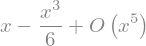

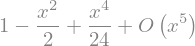

In [ ]:
x = sym.Symbol('x')
sin_taylor = sym.series(sym.sin(x), x, x0=0, n=5)
display(sin_taylor)

cos_taylor = sym.series(sym.cos(x), x, x0=0, n=5)
display(cos_taylor)

$O(x^5)$の部分は、剰余項という。まだ分かってない部分のこと。まだ分かってないことを示すには使えるけど計算には使えない。

.removeO()

と付けると消せる。

0(ゼロ)ではなくO(オー、大文字)である。

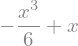

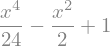

In [ ]:
sin_taylor = sym.series(sym.sin(x), x, x0=0, n=5).removeO()
display(sin_taylor)

cos_taylor = sym.series(sym.cos(x), x, x0=0, n=5).removeO()
display(cos_taylor)

### 18.sympyの関数をnumpyの関数に変換

sym.lambdify(x軸の刻み, sympyの関数f(x), 'numpy')

と書くと、sympyの関数をnumpyの関数(というかf(x)にxを入れていった計算結果)が出てくる。
そしてmatplotlibでplotできる。

こちらのサイトのコードを使わせてもらった。

- Python/sympyでテイラー展開した結果をグラフ化する方法
    - https://watlab-blog.com/2020/05/05/sympy-taylor-series/


x
x
-x**3/6 + x
-x**3/6 + x
x**5/120 - x**3/6 + x
x**5/120 - x**3/6 + x


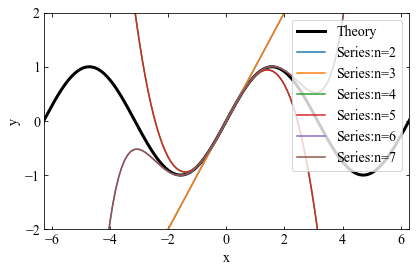

In [ ]:
# 理想波形を生成
cal_x = np.arange(-10.0, 10.1, 0.1)
cal_y = np.sin(cal_x)

# シンボルを定義
x = sym.Symbol('x')

# 任意点周りのテイラー展開を精度違いで計算する
sol = []                                                # 結果の入れ物
a = 0                                                   # 任意点
for i in range(6):
    taylor = sym.series(sym.sin(x), x=x, x0=a, n=i+2).removeO() # removeO()で剰余項を除去する
    print(taylor)                                       # 式を表示させて確認
    taylor_y = sym.lambdify(x, taylor, 'numpy')             # numpyの関数に変換
    sol.append(taylor_y(cal_x))                         # 関数に値を入れて曲線を計算

# ここからグラフ描画---------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルとスケールを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(-np.pi*2, np.pi*2)
ax1.set_ylim(-2, 2)

# データをプロットする。
ax1.plot(cal_x, cal_y, label='Theory', lw=3, color='black')
for j in range(len(sol)):
    ax1.plot(cal_x, sol[j], label='Series:n=' + str(j+2))

fig.tight_layout()

# グラフを表示する。
plt.legend()
plt.show()
plt.close()

### 19. $e^x$のマクローリン展開


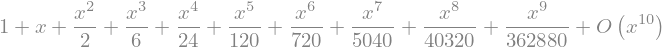

In [ ]:
x = sym.Symbol('x')
e_taylor = sym.series(sym.exp(x), x, x0=0, n=10)
display(e_taylor)


- ここでsin(x)とcos(x)のマクローリン展開を見てみる
- n = 10とすると

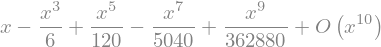

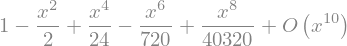

In [ ]:
x = sym.Symbol('x')
sin_taylor = sym.series(sym.sin(x), x, x0=0, n=10)
display(sin_taylor)


cos_taylor = sym.series(sym.cos(x), x, x0=0, n=10)
display(cos_taylor)

----
### 問5. $e^x$と、sin(x)とcos(x)はどういう関係にある？

オイラーの公式と見比べると…？

$
e^{i\theta} = \cos \theta + i \cdot \sin \theta
$


----

In [ ]:
# e^(ix) を0付近でテイラー展開する
display(sym.I)
display(sym.E)

x = sym.Symbol('x')
f1_taylor = sym.series(_______, x, x0=0, n=10)
display(f1_taylor)

In [ ]:
# cos(x) + i*sin(x)を 0付近でテイラー展開する
f2_taylor = ____

- ちなみに、sin(x)はnが奇数の時にしか情報が増えない。cosは逆で偶数のときのみ。

------------------------------
k =  0


------------------------------
k =  1


------------------------------
k =  2


------------------------------
k =  3


------------------------------
k =  4


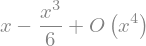

------------------------------
k =  5


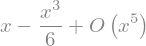

------------------------------
k =  6


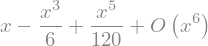

------------------------------
k =  7


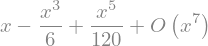

------------------------------
k =  8


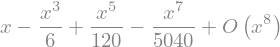

------------------------------
k =  9


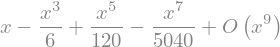

------------------------------
k =  10


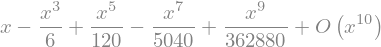

In [ ]:
x = sym.Symbol('x')

for k in range(0,11):
    print("-"*30)
    print("k = ",k)
    sin_taylor = sym.series(sym.sin(x), x, x0=0, n=k)
    display(sin_taylor)


----
#### フーリエ級数展開の式

$$
f(x)=\dfrac{a_0}{2}+\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)
$$


#### フーリエ変換の式

- フーリエ変換(波の関数f(x)を周波数の関数F(k)に変換する)
$$
F(k) = \int^{\infty}_{-\infty} f(x) \ e^{-ikx} dx
$$

- フーリエ逆変換(周波数の関数F(k)を波の関数f(x)に変換する)
$$
f(x) = \frac{1}{2\pi} \, \int^{\infty}_{-\infty} F(k) \ e^{ikx} dk
$$
----

$
e^{-ikx} = - \cos kx + i \sin kx
$


$$
F(k) = \int^{\infty}_{-\infty} f(x) \ (- \cos kx + i \sin kx) dx
$$


フーリエ級数展開の係数の求め方はこうだった。

$a_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\cos\dfrac{2\pi nx}{T}dx$

$b_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\sin\dfrac{2\pi nx}{T}dx$

フーリエ展開では係数を求める所が中に挟まってまとまっている。(っぽい)

----
## 課題6-1. フーリエ変換とフーリエ逆変換によるノイズ除去
- 「10. フーリエ変換、逆変換を用いたノイズ除去」の条件で、ノイズの乗った波に対し、周波数2,000Hz以上を除去した場合の波と、周波数1,000Hz以上を除去した場合のグラフを描き、元のグラフと合わせて3つのグラフの画像を提出せよ。
    - F が何を表しているのか、よくよく見直してみよう。
    - 負の周波数も、対応するところは残しておかないとおかしくなる。
- 画像とipynbファイルを提出


## 課題6-2. テイラー展開
- sin(x)の、x=1付近でのテイラー展開を、n=1から10次項まで求めた場合のグラフを、アニメーションで描いて動画で提出せよ
    - 途中増えないけどそれでよし
- 動画とipynbファイルを提出
    - ipynbファイルは1と共通でも別でも良い


## オプション課題6-3. 離散コサイン変換
- 「離散コサイン変換」で検索して調べ、画像の高周波成分を除去した場合について例を示せ

- 提出形式は自由